# TASK #1: UNDERSTAND THE PROBLEM STATEMENT 

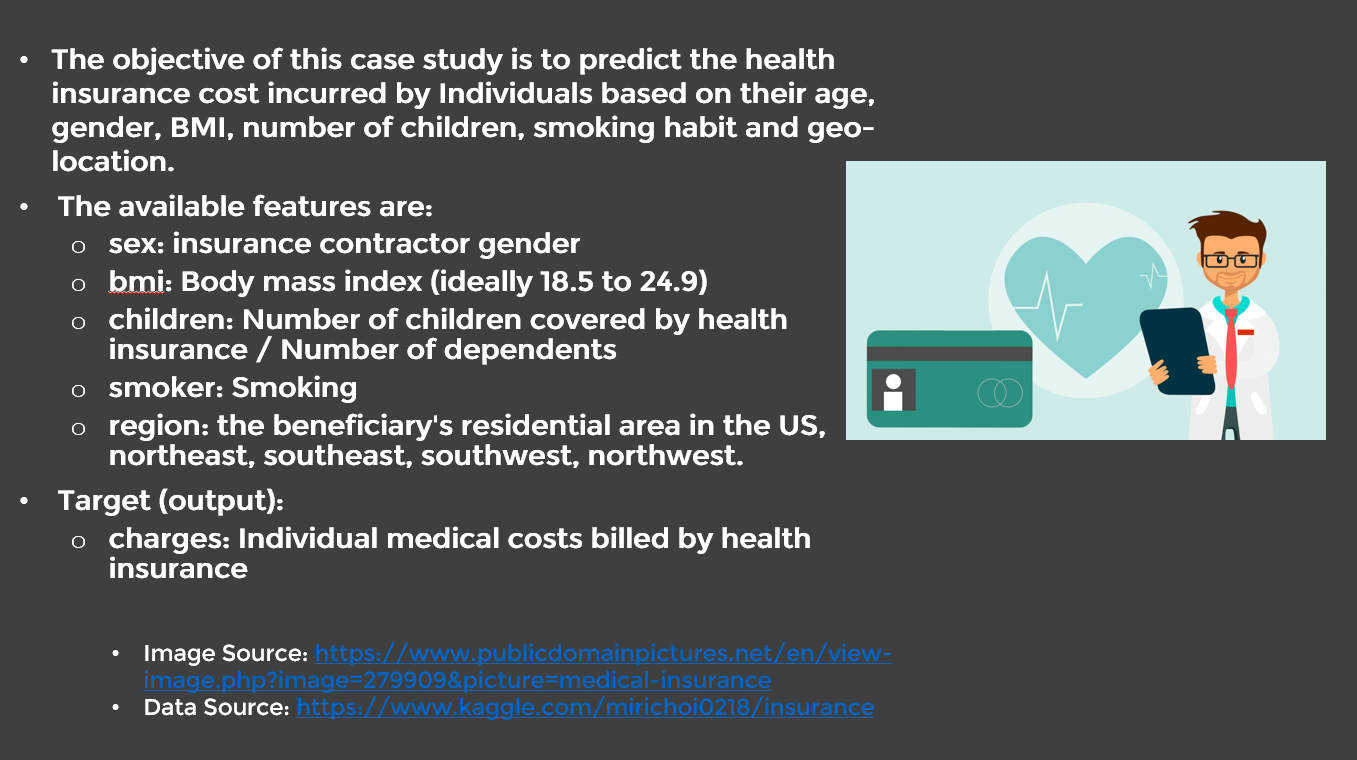

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [3]:
# read the csv file 
insurance_df =  pd.read_csv('insurance.csv')

In [4]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS - PART 1

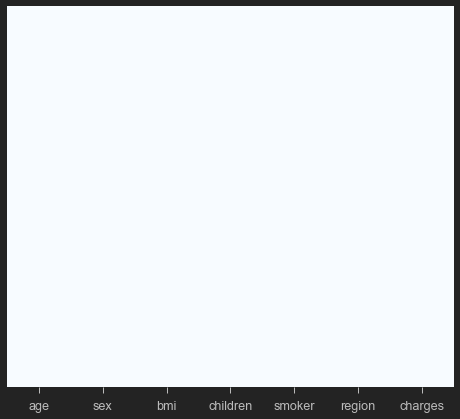

In [6]:
# check if there are any Null values
sns.heatmap(insurance_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")


In [7]:
# check if there are any Null values
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
# Check the dataframe
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
# Grouping by region to see any relationship between region and charges
# Seems like south east region has the highest charges and body mass index
df_region = insurance_df.groupby('region').mean()
df_region

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


**PRACTICE OPPORTUNITY #1 [OPTIONAL]:**
- **Group data by 'age' and examine the relationship between 'age' and 'charges'**


In [10]:
insurance_df.groupby('age').mean()['charges']

age
18     7086.217556
19     9747.909335
20    10159.697736
21     4730.464330
22    10012.932802
23    12419.820040
24    10648.015962
25     9838.365311
26     6133.825309
27    12184.701721
28     9069.187564
29    10430.158727
30    12719.110358
31    10196.980573
32     9220.300291
33    12351.532987
34    11613.528121
35    11307.182031
36    12204.476138
37    18019.911877
38     8102.733674
39    11778.242945
40    11772.251310
41     9653.745650
42    13061.038669
43    19267.278653
44    15859.396587
45    14830.199856
46    14342.590639
47    17653.999593
48    14632.500445
49    12696.006264
50    15663.003301
51    15682.255867
52    18256.269719
53    16020.930755
54    18758.546475
55    16164.545488
56    15025.515837
57    16447.185250
58    13878.928112
59    18895.869532
60    21979.418507
61    22024.457609
62    19163.856573
63    19884.998461
64    23275.530837
Name: charges, dtype: float64

# TASK #4: PERFORM FEATURE ENGINEERING

In [11]:
# Check unique values in the 'sex' column
insurance_df['sex'].unique()

array(['female', 'male'], dtype=object)

In [12]:
# convert categorical variable to numerical
insurance_df['male'] = pd.get_dummies(insurance_df['sex'],drop_first=True)
insurance_df.drop('sex',axis=1,inplace =True)

In [13]:
insurance_df.head()

,age,bmi,children,smoker,region,charges,male
0,19,27.900,0,yes,southwest,16884.92400,0
1,18,33.770,1,no,southeast,1725.55230,1
2,28,33.000,3,no,southeast,4449.46200,1
3,33,22.705,0,no,northwest,21984.47061,1
4,32,28.880,0,no,northwest,3866.85520,1


In [14]:
# Check the unique values in the 'smoker' column
insurance_df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [15]:
# Convert categorical variable to numerical 
insurance_df['smoker'] = insurance_df['smoker'].apply(lambda x: 0 if x == 'no' else 1)

In [16]:
insurance_df.head()

,age,bmi,children,smoker,region,charges,male
0,19,27.900,0,1,southwest,16884.92400,0
1,18,33.770,1,0,southeast,1725.55230,1
2,28,33.000,3,0,southeast,4449.46200,1
3,33,22.705,0,0,northwest,21984.47061,1
4,32,28.880,0,0,northwest,3866.85520,1


In [17]:
# Check unique values in 'region' column
insurance_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [18]:
region_dummies = pd.get_dummies(insurance_df['region'], drop_first = True)


In [19]:
region_dummies

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [20]:
insurance_df = pd.concat([insurance_df, region_dummies], axis = 1)

In [21]:
insurance_df.head()

,age,bmi,children,smoker,region,charges,male,northwest,southeast,southwest
0,19,27.900,0,1,southwest,16884.92400,0,0,0,1
1,18,33.770,1,0,southeast,1725.55230,1,0,1,0
2,28,33.000,3,0,southeast,4449.46200,1,0,1,0
3,33,22.705,0,0,northwest,21984.47061,1,1,0,0
4,32,28.880,0,0,northwest,3866.85520,1,1,0,0


In [22]:
# Let's drop the original 'region' column 
insurance_df.drop(['region'], axis = 1, inplace = True)


In [23]:
insurance_df.head()

,age,bmi,children,smoker,charges,male,northwest,southeast,southwest
0,19,27.900,0,1,16884.92400,0,0,0,1
1,18,33.770,1,0,1725.55230,1,0,1,0
2,28,33.000,3,0,4449.46200,1,0,1,0
3,33,22.705,0,0,21984.47061,1,1,0,0
4,32,28.880,0,0,3866.85520,1,1,0,0


# TASK #5: PERFORM DATA VISUALIZATION

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026FD0CBE898>,
      dtype=object)

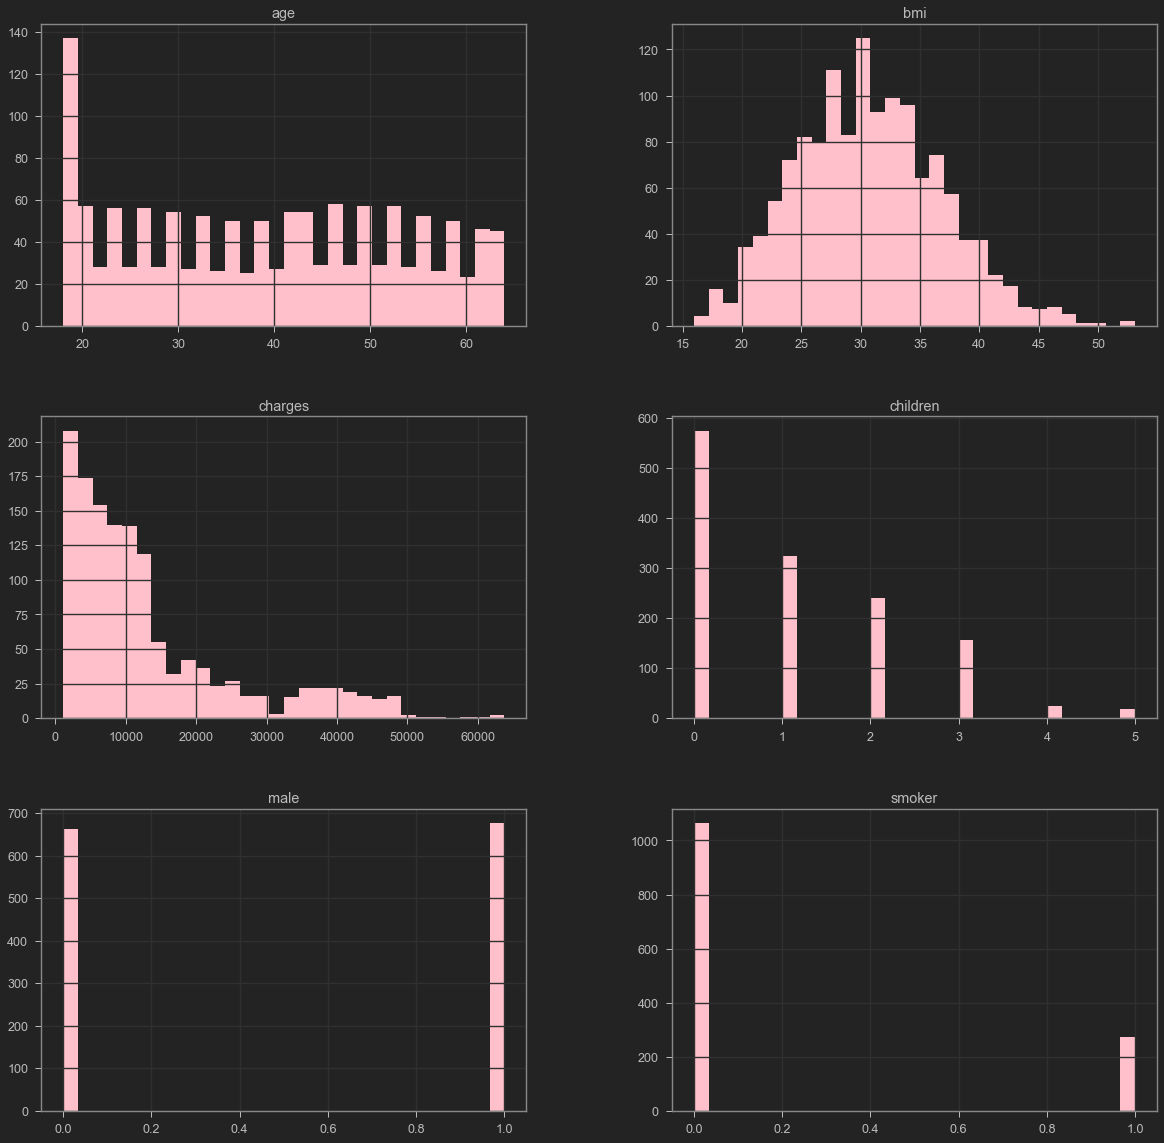

In [24]:
insurance_df[['age','male','bmi','smoker','charges','children']].hist(color='pink',bins=30,figsize=(20,20))

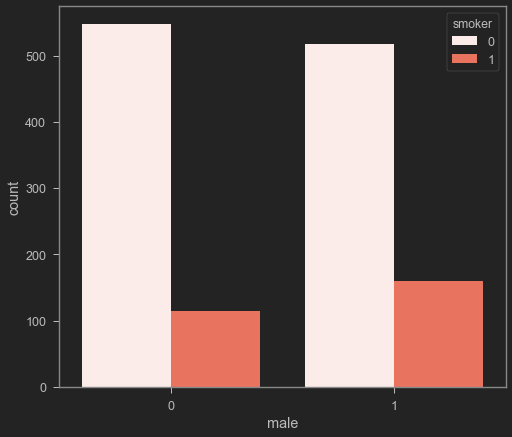

In [25]:
sns.countplot(x='male',hue='smoker',data = insurance_df,color ='tomato')

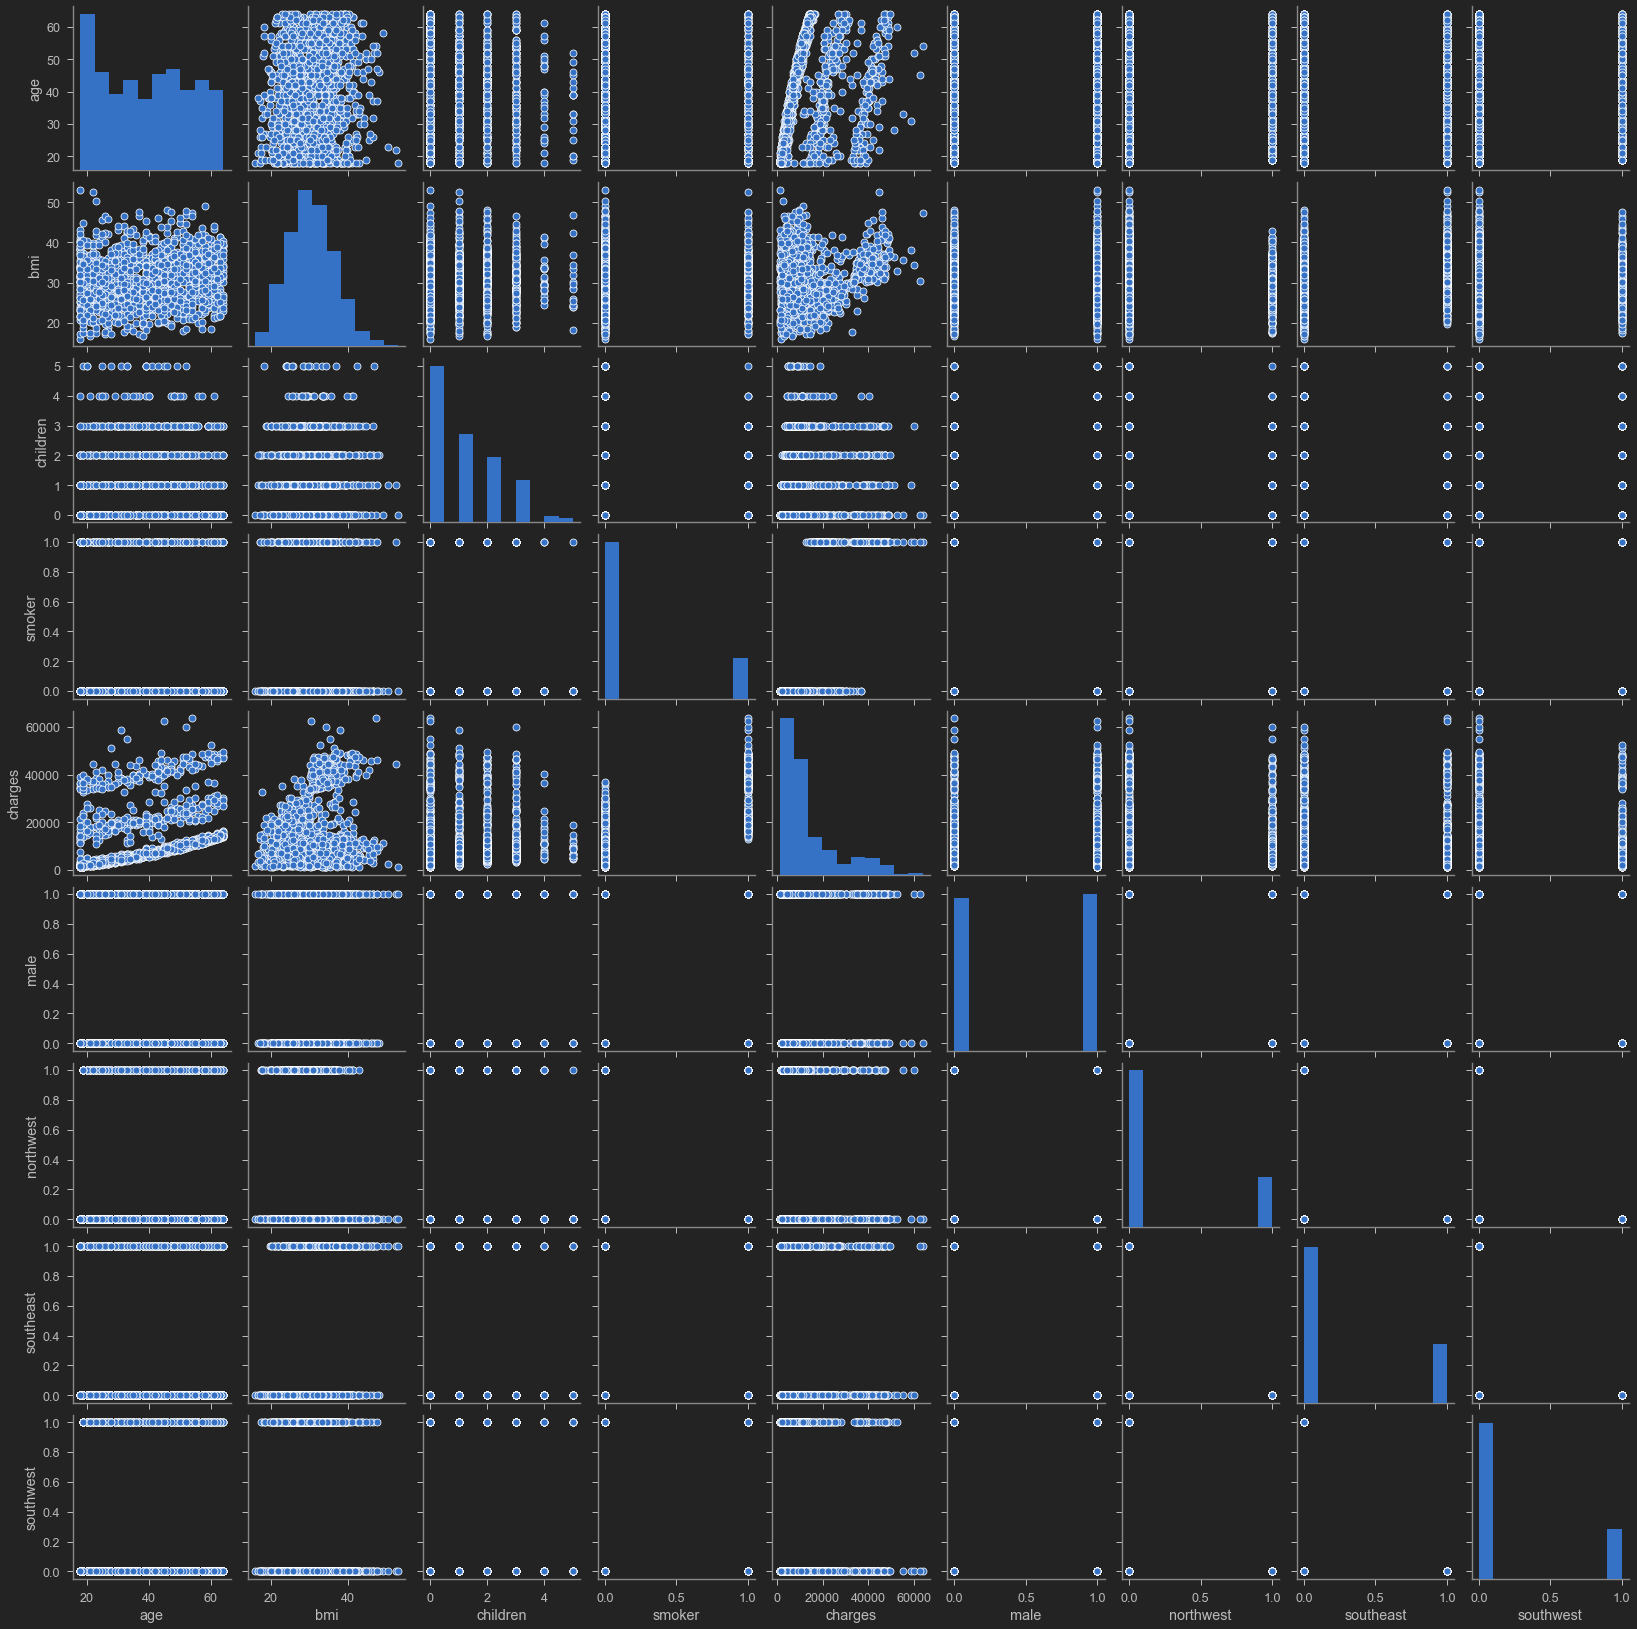

In [26]:
# plot pairplot
sns.pairplot(insurance_df)

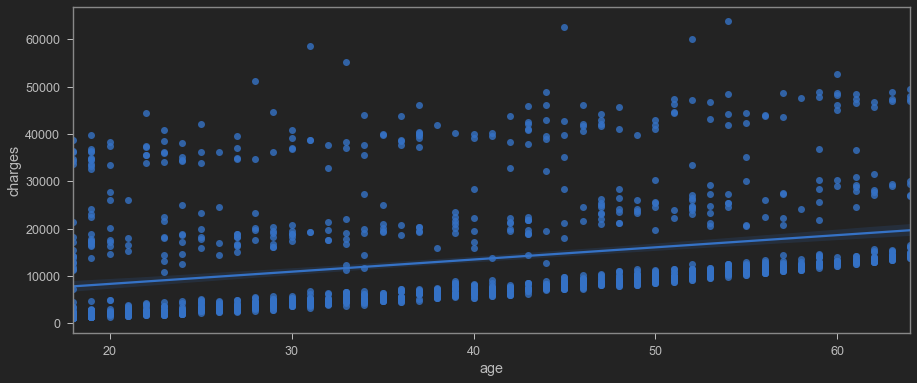

In [27]:
plt.figure(figsize = (15, 6))
sns.regplot(x = 'age', y = 'charges', data = insurance_df)
plt.show()
  

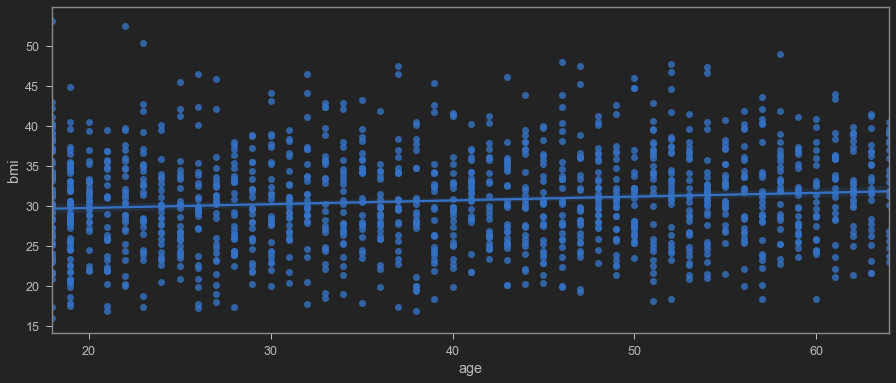

In [28]:
plt.figure(figsize = (15, 6))
sns.regplot(x = 'age', y = 'bmi', data = insurance_df)
plt.show()
  

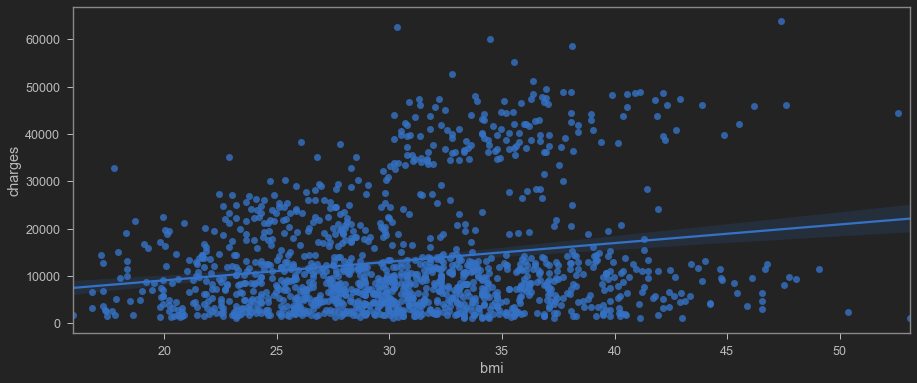

In [29]:
plt.figure(figsize = (15, 6))
sns.regplot(x = 'bmi', y = 'charges', data = insurance_df)
plt.show()

**PRACTICE OPPORTUNITY #2 [OPTIONAL]:**
 - **Calculate and plot the correlation matrix**
 - **Which feature has the most positive correlation with charges?**

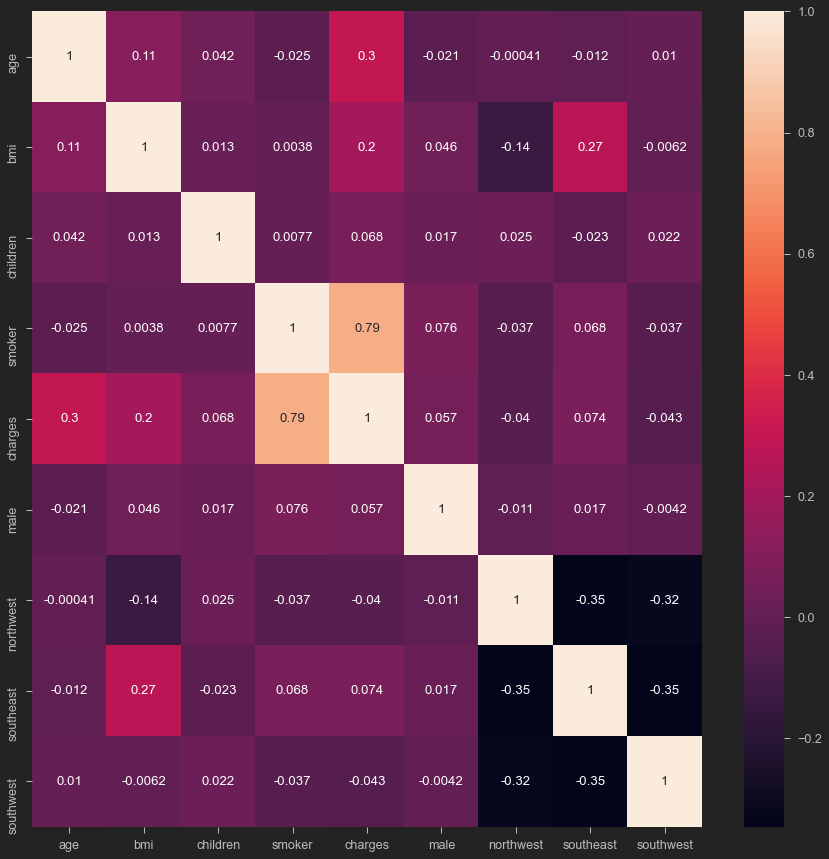

In [30]:
corr=insurance_df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True)
plt.show()

# TASK #6: CREATE TRAINING AND TESTING DATASET

In [31]:
insurance_df.columns

Index(['age', 'bmi', 'children', 'smoker', 'charges', 'male', 'northwest',
       'southeast', 'southwest'],
      dtype='object')

In [32]:
X = insurance_df.drop('charges',axis=1)
y = insurance_df['charges']

In [33]:
X

,age,bmi,children,smoker,male,northwest,southeast,southwest
0,19,27.900,0,1,0,0,0,1
1,18,33.770,1,0,1,0,1,0
2,28,33.000,3,0,1,0,1,0
3,33,22.705,0,0,1,1,0,0
4,32,28.880,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0
1334,18,31.920,0,0,0,0,0,0
1335,18,36.850,0,0,0,0,1,0
1336,21,25.800,0,0,0,0,0,1


In [34]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [35]:
X.shape

(1338, 8)

In [36]:
y.shape

(1338,)

In [37]:
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [38]:
y = y.reshape(-1,1)

In [39]:
# Only take the numerical variables and scale them
X 

array([[19.  , 27.9 ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [18.  , 33.77,  1.  , ...,  0.  ,  1.  ,  0.  ],
       [28.  , 33.  ,  3.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [18.  , 36.85,  0.  , ...,  0.  ,  1.  ,  0.  ],
       [21.  , 25.8 ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [61.  , 29.07,  0.  , ...,  1.  ,  0.  ,  0.  ]], dtype=float32)

In [40]:
#scaling the data before feeding the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)


**PRACTICE OPPORTUNITY #3 [OPTIONAL]:** 
- **Split the data into 20% Testing and 80% Training**
- **Double check that the split was successful by getting the shape of both the training and testing datasets**

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)
print('X_train : ',X_train.shape)
print('X_test : ',X_test.shape)
print('y_train : ',y_train.shape)
print('y_test : ',y_test.shape)

X_train :  (1070, 8)
X_test :  (268, 8)
y_train :  (1070, 1)
y_test :  (268, 1)


# TASK #7: TRAIN AND EVALUATE A LINEAR REGRESSION MODEL IN SCIKIT-LEARN

In [42]:
# using linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

regression_model = LinearRegression()
regression_model.fit(X_train,y_train)


LinearRegression()

In [43]:
regression_model_accuracy = regression_model.score(X_test, y_test)
regression_model_accuracy

0.6953286901057745

In [44]:
y_predict = regression_model.predict(X_test)

In [45]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)


In [46]:
k = X_test.shape[1]
n = len(X_test)
n

268

In [47]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt


RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 6536.847 
MSE = 42730364.0 
MAE = 4555.099 
R2 = 0.6953287186687489 
Adjusted R2 = 0.6859180227202932


# TASK #8: TRAIN AND EVALUATE AN ARTIFICIAL NEURAL NETWORK-BASED REGRESSION MODEL

In [48]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam


In [49]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 8))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                450       
_________________________________________________________________
activation (Activation)      (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 150)               7650      
_________________________________________________________________
activation_1 (Activation)    (None, 150)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)               22650     
_________________________________________________________________
activation_2 (Activation)    (None, 150)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                7

In [50]:
epochs_hist = ANN_model.fit(X_train,y_train,epochs=100,batch_size = 20,validation_split = 0.2)

Train on 856 samples, validate on 214 samples
Epoch 1/100
856/856 [==============================] - 1s 925us/sample - loss: 0.3741 - val_loss: 0.1771
Epoch 2/100
856/856 [==============================] - 0s 200us/sample - loss: 0.1570 - val_loss: 0.1656
Epoch 3/100
856/856 [==============================] - 0s 183us/sample - loss: 0.1428 - val_loss: 0.1766
Epoch 4/100
856/856 [==============================] - 0s 193us/sample - loss: 0.1355 - val_loss: 0.1816
Epoch 5/100
856/856 [==============================] - 0s 185us/sample - loss: 0.1275 - val_loss: 0.1594
Epoch 6/100
856/856 [==============================] - 0s 174us/sample - loss: 0.1304 - val_loss: 0.1836
Epoch 7/100
856/856 [==============================] - 0s 364us/sample - loss: 0.1292 - val_loss: 0.1809
Epoch 8/100
856/856 [==============================] - 0s 284us/sample - loss: 0.1223 - val_loss: 0.1867
Epoch 9/100
856/856 [==============================] - 0s 204us/sample - loss: 0.1157 - val_loss: 0.1657
Epoch 10/

Epoch 78/100
856/856 [==============================] - 0s 185us/sample - loss: 0.0357 - val_loss: 0.2173
Epoch 79/100
856/856 [==============================] - 0s 176us/sample - loss: 0.0382 - val_loss: 0.2540
Epoch 80/100
856/856 [==============================] - 0s 180us/sample - loss: 0.0388 - val_loss: 0.2404
Epoch 81/100
856/856 [==============================] - 0s 179us/sample - loss: 0.0363 - val_loss: 0.2091
Epoch 82/100
856/856 [==============================] - 0s 185us/sample - loss: 0.0362 - val_loss: 0.2328
Epoch 83/100
856/856 [==============================] - 0s 182us/sample - loss: 0.0392 - val_loss: 0.2633
Epoch 84/100
856/856 [==============================] - 0s 172us/sample - loss: 0.0354 - val_loss: 0.2228
Epoch 85/100
856/856 [==============================] - 0s 175us/sample - loss: 0.0324 - val_loss: 0.2467
Epoch 86/100
856/856 [==============================] - 0s 181us/sample - loss: 0.0343 - val_loss: 0.2627
Epoch 87/100
856/856 [========================

In [51]:
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1- result
print("Accuracy : {}".format(accuracy_ANN))

268/268 [==============================] - 0s 75us/sample - loss: 0.2655
Accuracy : 0.7345258442323599


In [52]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

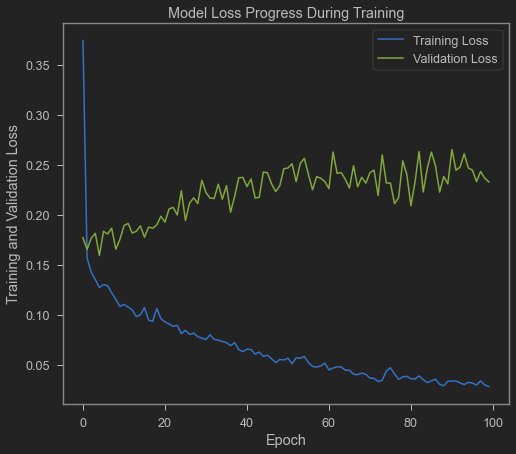

In [53]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

Text(0, 0.5, 'True Values')

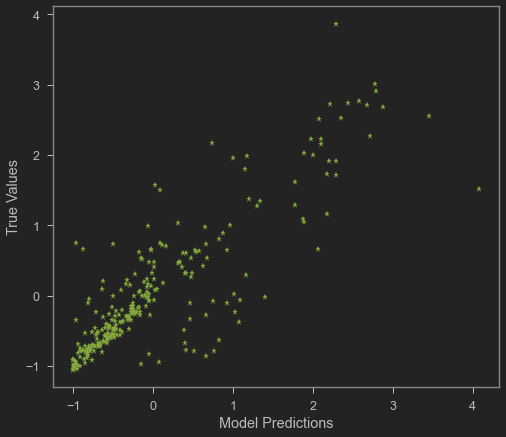

In [54]:
y_predict = ANN_model.predict(X_test)
plt.plot(y_test, y_predict, "*", color = 'g')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


In [55]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

Text(0, 0.5, 'True Values')

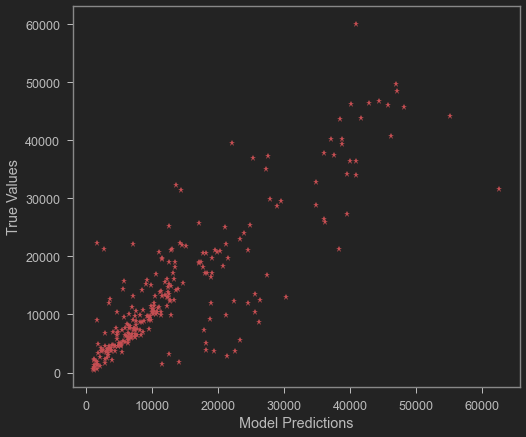

In [56]:
plt.plot(y_test_orig, y_predict_orig, "*", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


In [57]:
k = X_test.shape[1]
n = len(X_test)
n

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 6237.252 
MSE = 38903320.0 
MAE = 3682.8992 
R2 = 0.7226158729527588 
Adjusted R2 = 0.7140480234686741


**PRACTICE OPPORTUNITY #4 [OPTIONAL]:** 
- **Dropout is a regularization technique that is used to improve the network generalization ability. Experiment adding dropout layers to enahnce network generalization ability**
- **Retrain the network and assess its performance**

In [58]:
ANN_model_new= keras.Sequential()
ANN_model_new.add(Dense(50, input_dim = 8))
ANN_model_new.add(Activation('relu'))
ANN_model_new.add(Dense(150))
ANN_model_new.add(Activation('relu'))
ANN_model_new.add(Dropout(0.5))        
ANN_model_new.add(Dense(150))
ANN_model_new.add(Activation('relu'))
ANN_model_new.add(Dropout(0.5))             
ANN_model_new.add(Dense(50))
ANN_model_new.add(Activation('linear'))
ANN_model_new.add(Dense(1))
ANN_model_new.compile(loss = 'mse', optimizer = 'adam')
ANN_model_new.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 50)                450       
_________________________________________________________________
activation_4 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 150)               7650      
_________________________________________________________________
activation_5 (Activation)    (None, 150)               0         
_________________________________________________________________
dropout (Dropout)            (None, 150)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 150)               22650     
_________________________________________________________________
activation_6 (Activation)    (None, 150)              

In [59]:
epochs_hist = ANN_model_new.fit(X_train,y_train,epochs=100,batch_size = 20,validation_split = 0.2)

Train on 856 samples, validate on 214 samples
Epoch 1/100
856/856 [==============================] - 1s 715us/sample - loss: 0.7371 - val_loss: 0.2941
Epoch 2/100
856/856 [==============================] - 0s 207us/sample - loss: 0.3808 - val_loss: 0.2360
Epoch 3/100
856/856 [==============================] - 0s 225us/sample - loss: 0.2953 - val_loss: 0.1846
Epoch 4/100
856/856 [==============================] - 0s 203us/sample - loss: 0.2606 - val_loss: 0.1815
Epoch 5/100
856/856 [==============================] - 0s 204us/sample - loss: 0.2184 - val_loss: 0.1706
Epoch 6/100
856/856 [==============================] - 0s 215us/sample - loss: 0.2337 - val_loss: 0.1698
Epoch 7/100
856/856 [==============================] - 0s 192us/sample - loss: 0.2191 - val_loss: 0.1995
Epoch 8/100
856/856 [==============================] - 0s 178us/sample - loss: 0.2101 - val_loss: 0.1793
Epoch 9/100
856/856 [==============================] - 0s 180us/sample - loss: 0.2107 - val_loss: 0.1684
Epoch 10/

Epoch 78/100
856/856 [==============================] - 0s 167us/sample - loss: 0.1310 - val_loss: 0.1873
Epoch 79/100
856/856 [==============================] - 0s 160us/sample - loss: 0.1289 - val_loss: 0.1930
Epoch 80/100
856/856 [==============================] - 0s 152us/sample - loss: 0.1387 - val_loss: 0.1967
Epoch 81/100
856/856 [==============================] - 0s 173us/sample - loss: 0.1239 - val_loss: 0.1784
Epoch 82/100
856/856 [==============================] - 0s 229us/sample - loss: 0.1283 - val_loss: 0.1995
Epoch 83/100
856/856 [==============================] - 0s 178us/sample - loss: 0.1303 - val_loss: 0.1896
Epoch 84/100
856/856 [==============================] - 0s 187us/sample - loss: 0.1272 - val_loss: 0.2013
Epoch 85/100
856/856 [==============================] - 0s 172us/sample - loss: 0.1283 - val_loss: 0.1932
Epoch 86/100
856/856 [==============================] - 0s 183us/sample - loss: 0.1277 - val_loss: 0.2023
Epoch 87/100
856/856 [========================

In [60]:
result = ANN_model_new.evaluate(X_test, y_test)
accuracy_ANN_new = 1- result
print("Accuracy : {}".format(accuracy_ANN_new))

268/268 [==============================] - 0s 64us/sample - loss: 0.2242
Accuracy : 0.7758427538088898


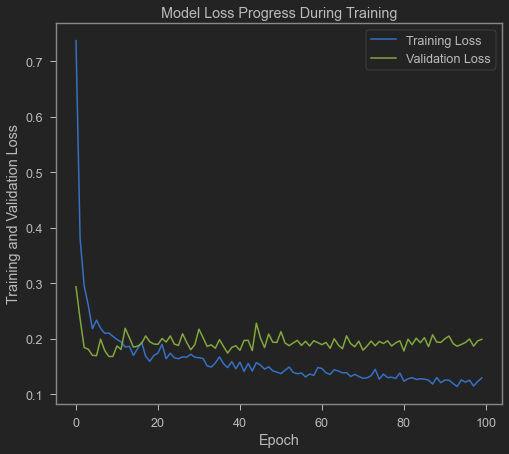

In [61]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

Text(0, 0.5, 'True Values')

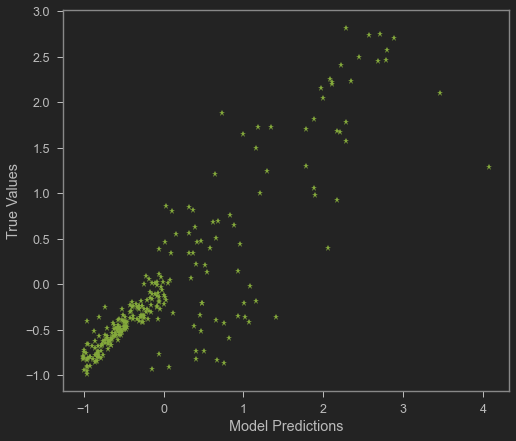

In [62]:
y_predict = ANN_model_new.predict(X_test)
plt.plot(y_test, y_predict, "*", color = 'g')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

Text(0, 0.5, 'True Values')

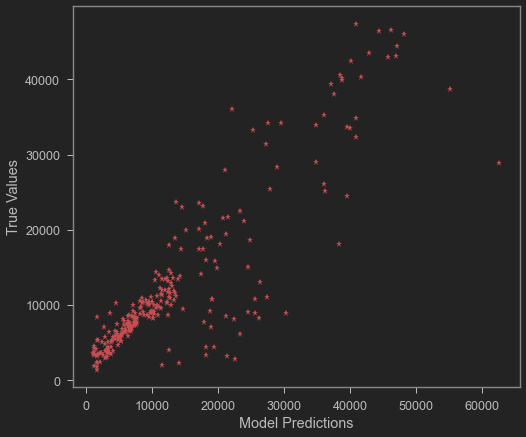

In [63]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)
plt.plot(y_test_orig, y_predict_orig, "*", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

In [64]:
k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 5731.372 
MSE = 32848620.0 
MAE = 3241.5237 
R2 = 0.7657863959165231 
Adjusted R2 = 0.7585519988791956
